In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [167]:
df = pd.read_csv('wines_merged.csv')

In [168]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

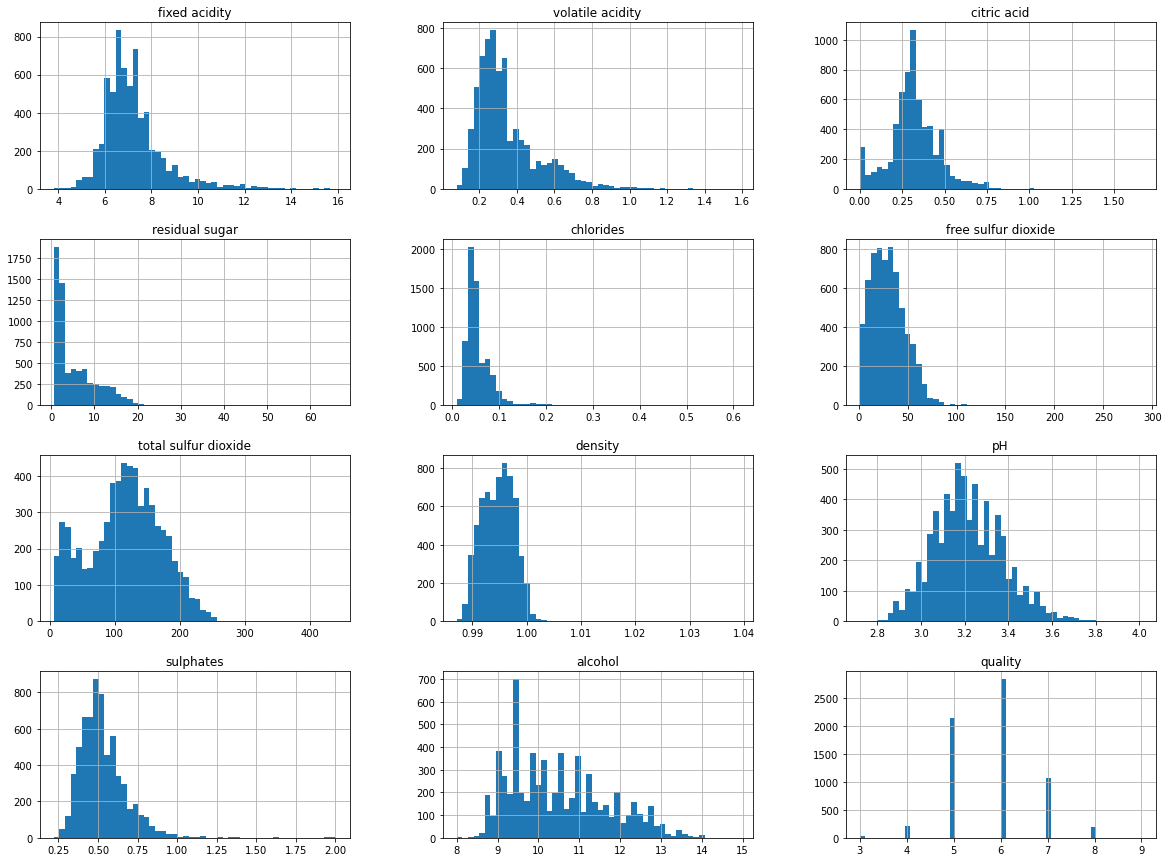

In [169]:
df.hist(bins=50,figsize=(20,15))

In [170]:
def log_transform(col):
    return np.log(col[0])

df['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)

In [171]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
free sulfur dioxide     0.113564
citric acid             0.085532
sulphates               0.027437
pH                      0.019506
total sulfur dioxide    0.009365
residual sugar         -0.012986
fixed acidity          -0.076743
volatile acidity       -0.265699
chlorides              -0.267391
density                -0.305858
Name: quality, dtype: float64

<AxesSubplot:>

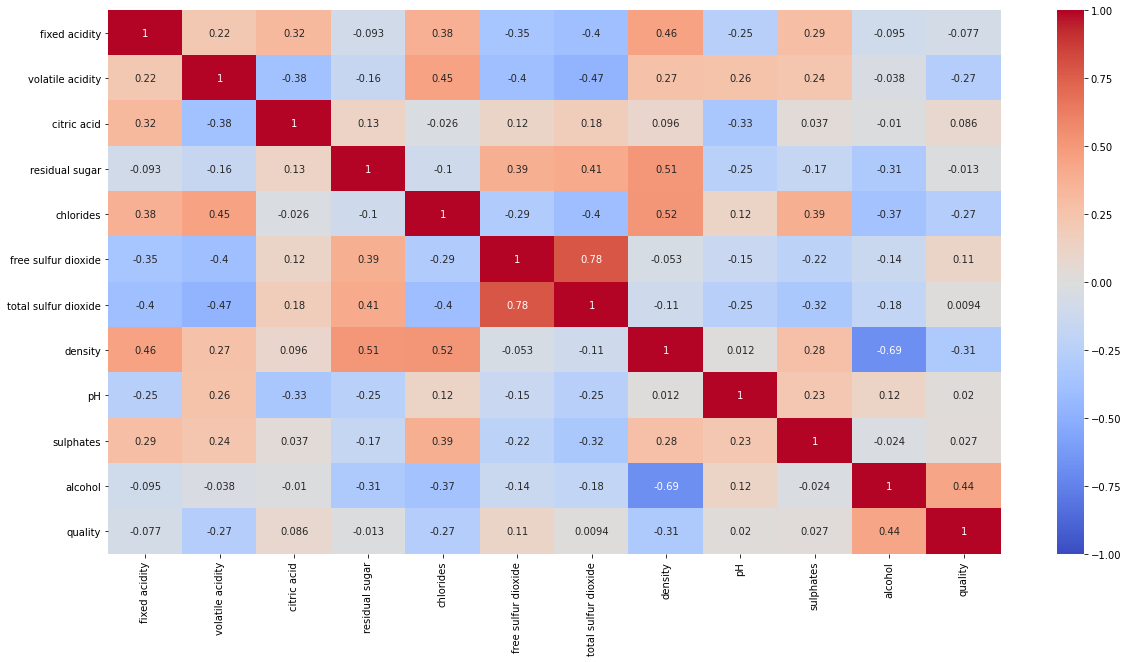

In [172]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm',annot=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

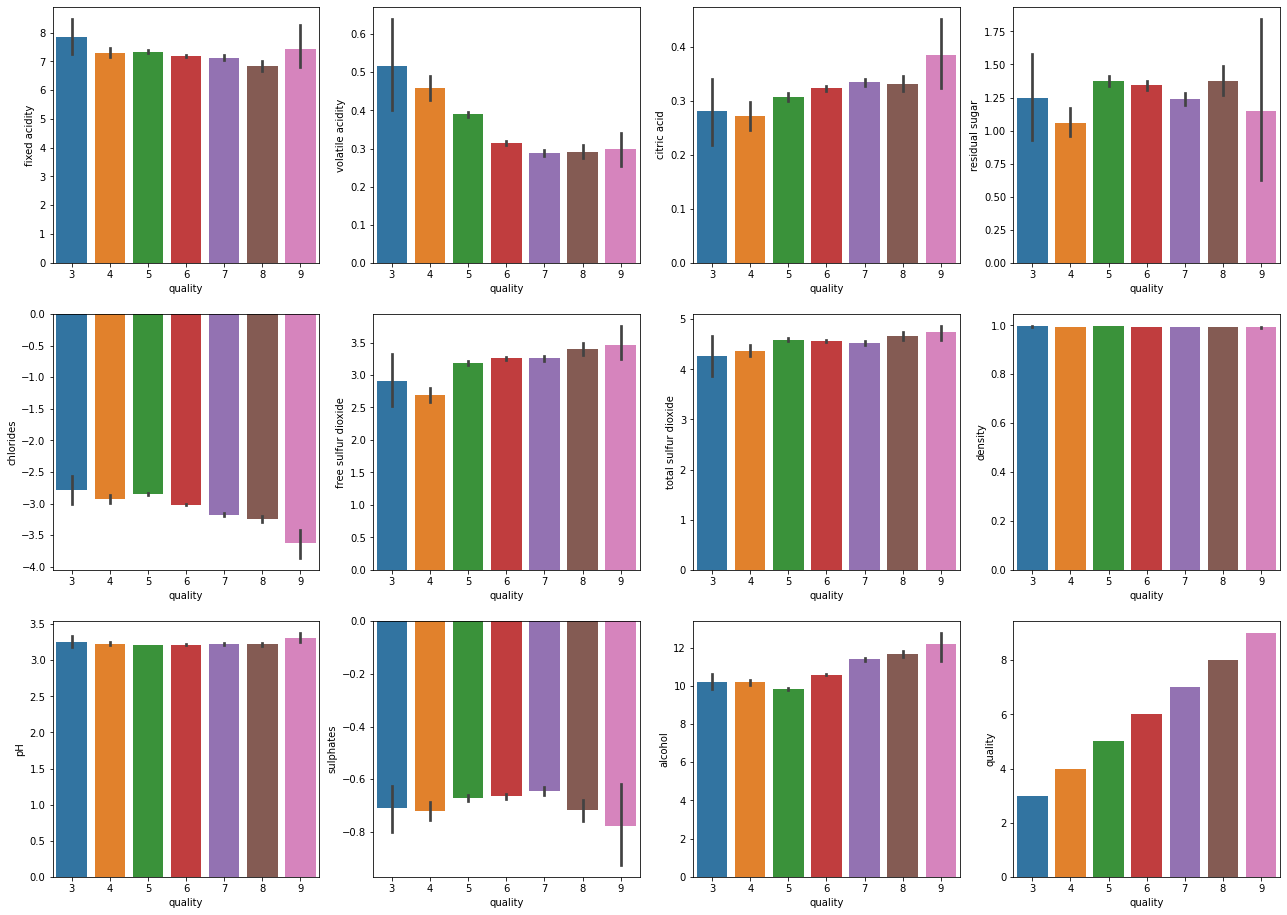

In [173]:
fig, ax1 = plt.subplots(3,4, figsize=(22,16))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.barplot(df['quality'], df[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='alcohol', ylabel='volatile acidity'>

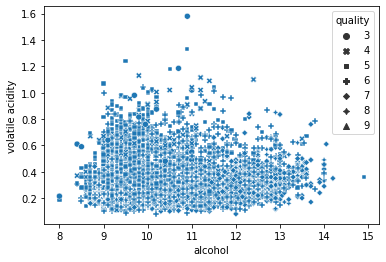

In [174]:
sns.scatterplot('alcohol','volatile acidity',style='quality',data=df)

In [2]:
# insight: Volatile acidity and alchohol have high correlations with the target variable.

In [162]:
# category wine color
df['color'].replace({'white':0, 'red':1}, inplace=True)
df.rename(columns={'color':'is_red_wine'}, inplace=True)

In [163]:
#df["quality"]=np.where(df["quality"]<6, 0, 1)
df['quality'] = np.where(df['quality'] >=7, 1, 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red_wine
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,0,1
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,0,1
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,0,1
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,0,1
4,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,0,1


In [112]:
df['quality'].value_counts()

0    5220
1    1277
Name: quality, dtype: int64

In [164]:
# Part 3: Fitting and evaluation various models

In [118]:
# Saving the independent variables to 'X'
X = df.drop("quality", axis=1)
# Saving dependent variable to 'y'
y = df["quality"]

In [119]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red_wine
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,1
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,1
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,1
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,1
4,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,1


In [70]:
# Initial check for multicollinearity
# Using variance inflation factor

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series(
    data = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index = X.columns
)

fixed acidity             70.662957
volatile acidity          11.127602
citric acid                9.190071
residual sugar             4.656570
chlorides                110.966239
free sulfur dioxide       62.640489
total sulfur dioxide     215.622871
density                 1212.554725
pH                       649.970190
sulphates                 10.987603
alcohol                  115.815300
is_red_wine                8.076981
dtype: float64

In [72]:
# Adding constant to our X
X_const = sm.add_constant(X)
X_const.head()

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red_wine
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
# If we didn't add a constant then the sm.Logit would not calculate the constant and assume (B0 = 0), which would alter our coefficients as well.
# Now, let's fit the model to the data:

In [73]:
# Instantiate and fit the logistic regression model
logreg = sm.Logit(y, X_const).fit()
# Display the results 
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.390855
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6484
Method:                           MLE   Df Model:                           12
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.2113
Time:                        18:23:38   Log-Likelihood:                -2539.4
converged:                       True   LL-Null:                       -3219.8
Covariance Type:            nonrobust   LLR p-value:                3.799e-284
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  402.0945     65.700      6.120      0.000     273.325     530.864
fixed acidity            0.4940      0.067      7.362      0.000       0.362       0.626
volatile acidity        -3.6631      0.388     -9.437      0.000      -4.424      -2.902
citric acid             -0.2488      0.346     -0.719      0.472      -0.927       0.429
residual sugar           0.2198      0.026      8.367      0.000       0.168       0.271
chlorides               -7.6116      2.497     -3.048      0.002     -12.507      -2.717
free sulfur dioxide      0.0108      0.003      3.657      0.000       0.005       0.017
total sulfur dioxide    -0.0037      0.001     -2.776      0.006      -0.006      -0.001
density               -423.7827     66.726     -6.351      0.000    -554.563    -293.003
pH                       2.5964      0.361      7.185      0.000       1.888       3.305
sulphates                2.4586      0.285      8.615      0.000       1.899       3.018
alcohol                  0.4541      0.081      5.618      0.000       0.296       0.613
is_red_wine              0.7747      0.245      3.167      0.002       0.295       1.254
========================================================================================
"""

In [74]:
# We can now evaluate how well our model performed by looking at the accuracy of its predictions.

In [75]:
# Check accuracy
# Define a function to check logistic model accuracy
def get_acc(logreg, X_const, y):
    y_proba = logreg.predict(X_const)
    y_pred = np.where(y_proba >= 0.5, 1, 0)
    acc = (y_pred == y).mean()
    print(f"Accuracy: {acc}")

In [76]:
# Get model accuracy
get_acc(logreg, X_const, y)

Accuracy: 0.8182237955979683


In [ ]:
# So our model had a accuracy score of 81.82% which is decent given we only used 12 variables and this was the first model specification we fit.

In [ ]:
# Looking at the p-values

In [79]:
# Drop 'citric acid' since it has p-values over 0.05
X_const = X_const.drop(["citric acid"], axis=1)
X_const

,const,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red_wine
0,1.0,7.4,0.70,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,1.0,7.8,0.88,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,1.0,7.8,0.76,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,1.0,11.2,0.28,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,1.0,7.4,0.70,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,6.2,0.21,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,1.0,6.6,0.32,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,1.0,6.5,0.24,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,1.0,5.5,0.29,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [84]:
# Redo the process

# Istantiate and fit the logistic regression model 
logreg = sm.Logit(y, X_const).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.390895
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6485
Method:                           MLE   Df Model:                           11
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.2112
Time:                        18:36:14   Log-Likelihood:                -2539.6
converged:                       True   LL-Null:                       -3219.8
Covariance Type:            nonrobust   LLR p-value:                4.319e-285
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  405.0432     65.554      6.179      0.000     276.561     533.526
fixed acidity            0.4839      0.066      7.381      0.000       0.355       0.612
volatile acidity        -3.5720      0.367     -9.745      0.000      -4.290      -2.854
residual sugar           0.2202      0.026      8.388      0.000       0.169       0.272
chlorides               -7.7348      2.487     -3.111      0.002     -12.608      -2.861
free sulfur dioxide      0.0109      0.003      3.688      0.000       0.005       0.017
total sulfur dioxide    -0.0038      0.001     -2.855      0.004      -0.006      -0.001
density               -426.7146     66.582     -6.409      0.000    -557.213    -296.216
pH                       2.6066      0.361      7.222      0.000       1.899       3.314
sulphates                2.4497      0.285      8.592      0.000       1.891       3.008
alcohol                  0.4458      0.080      5.575      0.000       0.289       0.603
is_red_wine              0.7856      0.244      3.219      0.001       0.307       1.264
========================================================================================
"""

In [81]:
# Get model updated accuracy
get_acc(logreg, X_const, y)

Accuracy: 0.816992458057565


In [ ]:
# Interpreting coefficents:
# Let's interpret some of the coefficients and determine how the different factors impact the odds of the quality of wines.

In [82]:
# Let's put this in a dataframe
result_df = pd.DataFrame(logreg.params, columns=["Coeff"])
result_df

,Coeff
const,405.043172
fixed acidity,0.483907
volatile acidity,-3.572049
residual sugar,0.220186
chlorides,-7.734761
free sulfur dioxide,0.010886
total sulfur dioxide,-0.003796
density,-426.714577
pH,2.606564
sulphates,2.449671


In [83]:
# Calculate and add the odds ratios to results_df
result_df["odd_ratio"] = np.exp(result_df["Coeff"])
result_df

,Coeff,odd_ratio
const,405.043172,8.091227e+175
fixed acidity,0.483907,1.622401e+00
volatile acidity,-3.572049,2.809823e-02
residual sugar,0.220186,1.246308e+00
chlorides,-7.734761,4.373569e-04
free sulfur dioxide,0.010886,1.010945e+00
total sulfur dioxide,-0.003796,9.962108e-01
density,-426.714577,4.788657e-186
pH,2.606564,1.355240e+01
sulphates,2.449671,1.158453e+01


In [122]:
# testing
df2 = pd.read_csv('wines_merged.csv')
df2.shape

(6497, 13)

In [124]:
# category wine color
df2['color'].replace({'white':0, 'red':1}, inplace=True)
df2.rename(columns={'color':'is_red_wine'}, inplace=True)

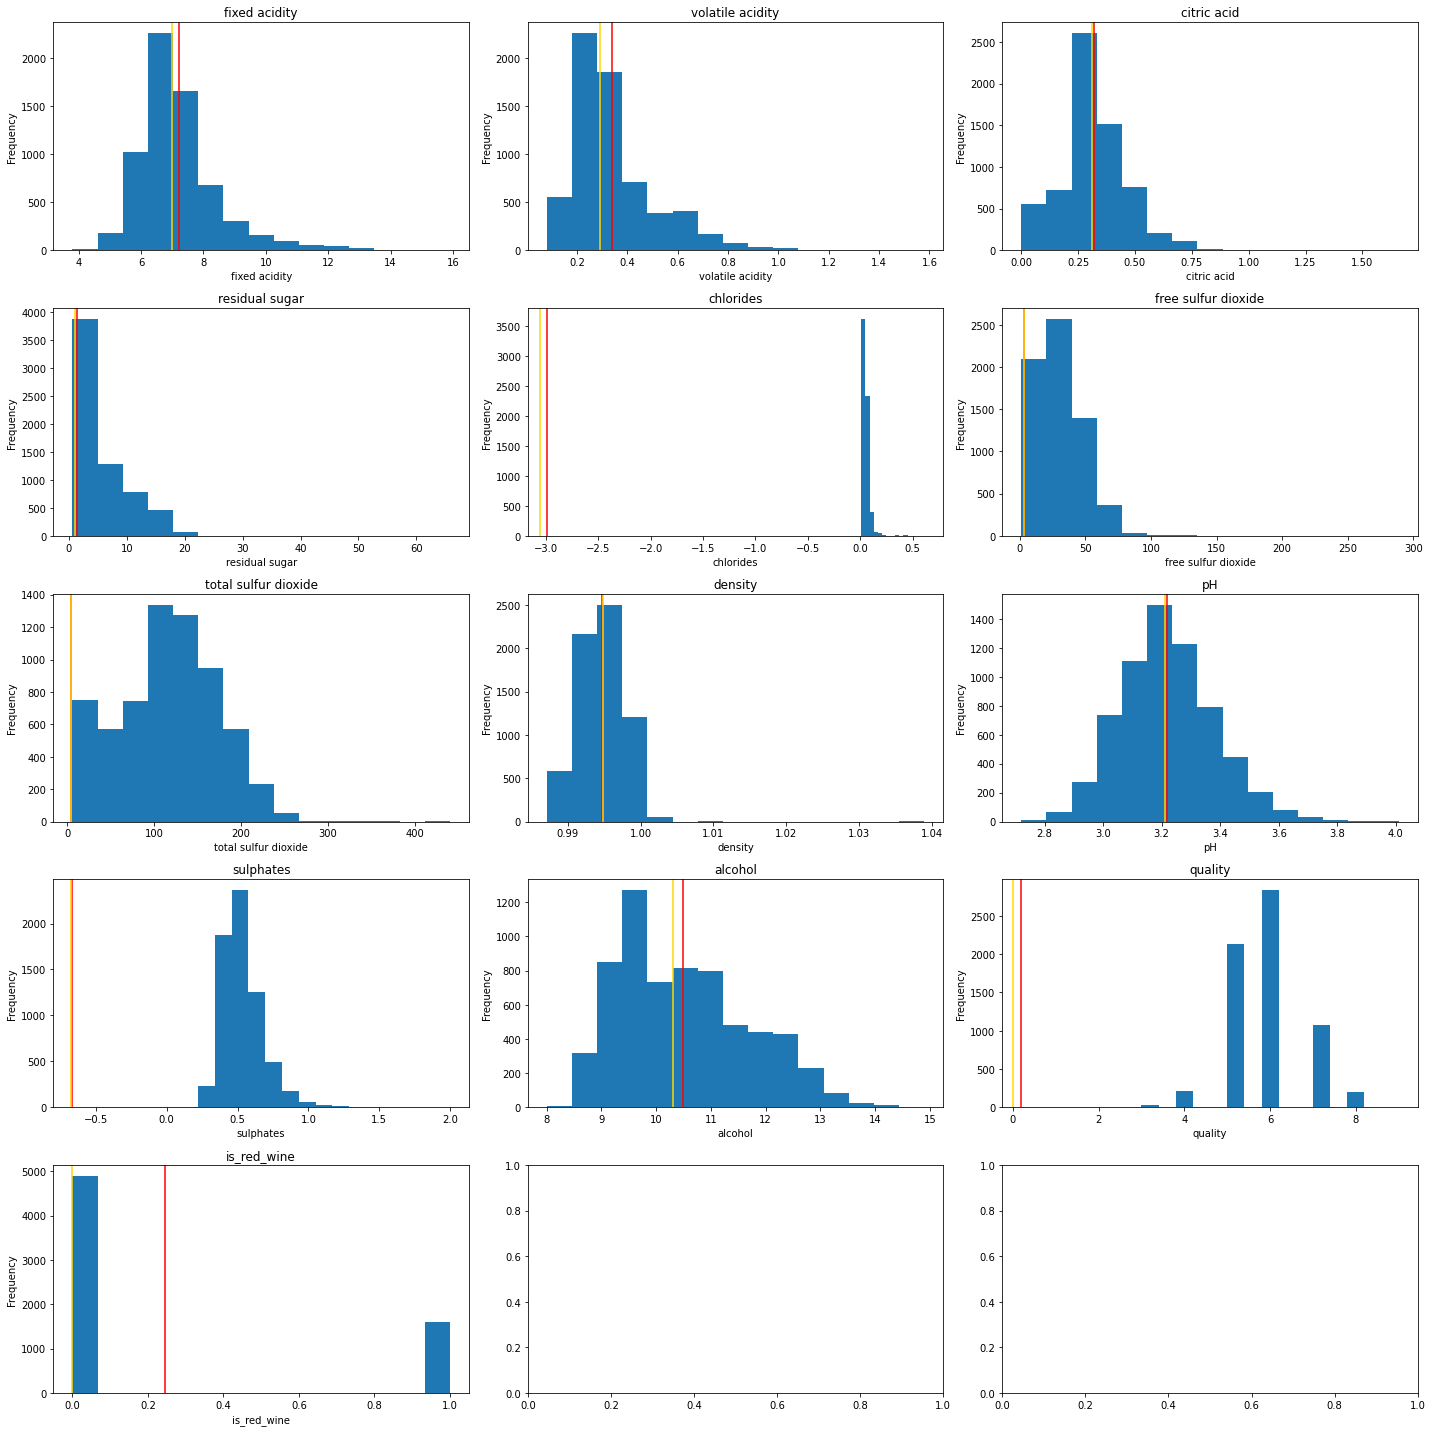

In [126]:
# First lets check out the distributions.
# We are going to loop over the columns and print some subplots.

# We will be making 2 rows x 4 columns of subplots
plt.subplots(5,3, figsize=(20,20))

# Creating the for loop
for slot_num, column in enumerate(df2.columns, start=1):
    
    # Creating a hist for every iteration
    plt.subplot(5,3, slot_num)
    plt.hist(df2[column], bins=15)
    # Set the titles and labels
    plt.ylabel("Frequency")
    plt.xlabel(column)
    plt.title(column)
    # Adding median and mean lines
    plt.axvline(df[column].mean(), c="red", label="mean")
    plt.axvline(df[column].median(), c="gold", label="median")
    
plt.tight_layout()

plt.show()

In [127]:
# convert quality
df2['quality'] = np.where(df2['quality'] >=7, 1, 0)

In [131]:
df2['quality'].value_counts()

0    5220
1    1277
Name: quality, dtype: int64

<AxesSubplot:>

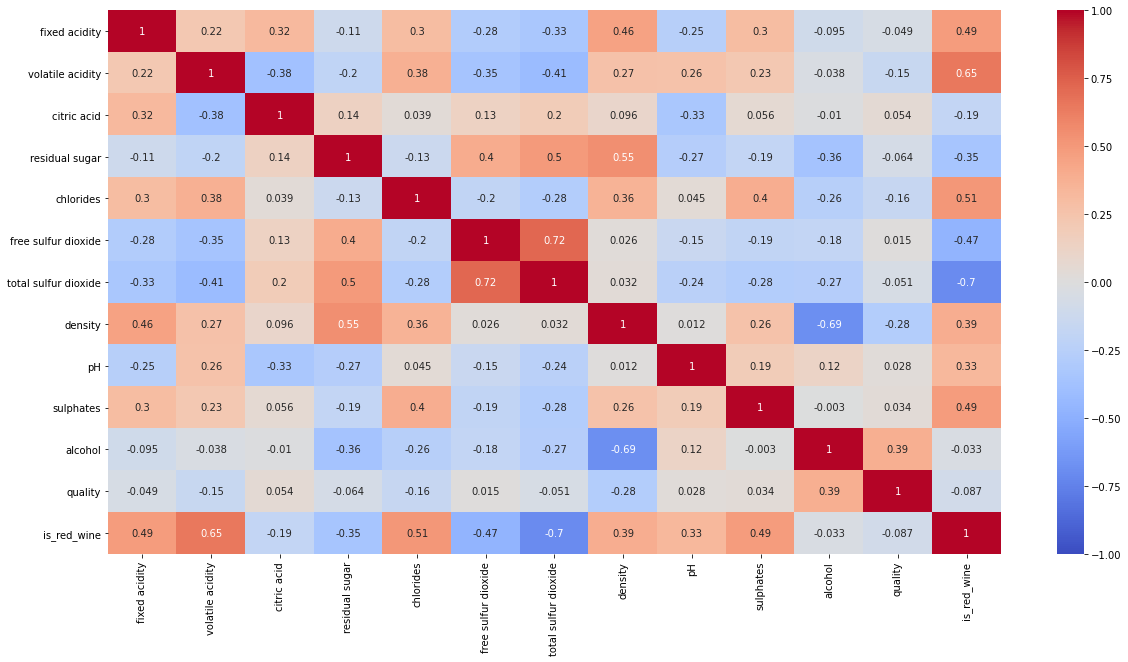

In [133]:
# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = df2.corr()
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, cmap="coolwarm", vmin=-1, vmax=1, center=0, annot=True)

In [136]:
# Are these correlations statistically significant?
# Pearson's Correlation Coefficient Test + P_values
# H0: rho = 0
# H1: rho != 0
xxx = df2.drop(["quality"],axis=1)
yyy = df2["quality"]

In [139]:
from scipy import stats
import statsmodels.api as sm
for i in xxx.columns:
    r, p_val = stats.pearsonr(xxx[i], yyy)
    print(f'Column: {i}, corr_coef: {r}, p_val: {p_val}')

Column: fixed acidity, corr_coef: -0.04944732921839155, p_val: 6.682296241548082e-05
Column: volatile acidity, corr_coef: -0.1517138210475807, p_val: 9.327180422125681e-35
Column: citric acid, corr_coef: 0.0544444916826178, p_val: 1.129060811570326e-05
Column: residual sugar, corr_coef: -0.06399191653701568, p_val: 2.439322259336484e-07
Column: chlorides, corr_coef: -0.16178147898084935, p_val: 2.3909892435934926e-39
Column: free sulfur dioxide, corr_coef: 0.014767063757208909, p_val: 0.23399929912076436
Column: total sulfur dioxide, corr_coef: -0.05122561135565441, p_val: 3.613375403764817e-05
Column: density, corr_coef: -0.27544082974541356, p_val: 1.8902613850140516e-113
Column: pH, corr_coef: 0.028148701652277994, p_val: 0.023273793853144945
Column: sulphates, corr_coef: 0.0339708792724205, p_val: 0.0061729319568592485
Column: alcohol, corr_coef: 0.39048601262473737, p_val: 1.179668102500585e-235
Column: is_red_wine, corr_coef: -0.08747895850677656, p_val: 1.6254939126726903e-12


In [146]:
def log_transform2(col):
    return np.log(col[0])

df2['residual sugar'] = df2[['residual sugar']].apply(log_transform2, axis=1)
df2['chlorides'] = df2[['chlorides']].apply(log_transform2, axis=1)
df2['free sulfur dioxide'] = df2[['free sulfur dioxide']].apply(log_transform2, axis=1)
df2['total sulfur dioxide'] = df2[['total sulfur dioxide']].apply(log_transform2, axis=1)
df2['sulphates'] = df2[['sulphates']].apply(log_transform2, axis=1)

In [151]:
# Are these correlations statistically significant?
# Pearson's Correlation Coefficient Test + P_values
# H0: rho = 0
# H1: rho != 0
xxx = df2.drop(["quality"],axis=1)
yyy = df2["quality"]

In [152]:
from scipy import stats
import statsmodels.api as sm
for i in xxx.columns:
    r, p_val = stats.pearsonr(xxx[i], yyy)
    print(f'Column: {i}, corr_coef: {r}, p_val: {p_val}')

Column: fixed acidity, corr_coef: -0.04944732921839155, p_val: 6.682296241548082e-05
Column: volatile acidity, corr_coef: -0.1517138210475807, p_val: 9.327180422125681e-35
Column: citric acid, corr_coef: 0.0544444916826178, p_val: 1.129060811570326e-05
Column: residual sugar, corr_coef: -0.03982838273532937, p_val: 0.001322821912358705
Column: chlorides, corr_coef: -0.2272677189685016, p_val: 6.960607012850453e-77
Column: free sulfur dioxide, corr_coef: 0.045032416328753495, p_val: 0.0002823962587177839
Column: total sulfur dioxide, corr_coef: -0.015425265006135135, p_val: 0.21380434021655842
Column: density, corr_coef: -0.27544082974541356, p_val: 1.8902613850140516e-113
Column: pH, corr_coef: 0.028148701652277994, p_val: 0.023273793853144945
Column: sulphates, corr_coef: 0.02128833734055105, p_val: 0.08620071138330564
Column: alcohol, corr_coef: 0.39048601262473737, p_val: 1.179668102500585e-235
Column: is_red_wine, corr_coef: -0.08747895850677656, p_val: 1.6254939126726903e-12
